# 11 - 1

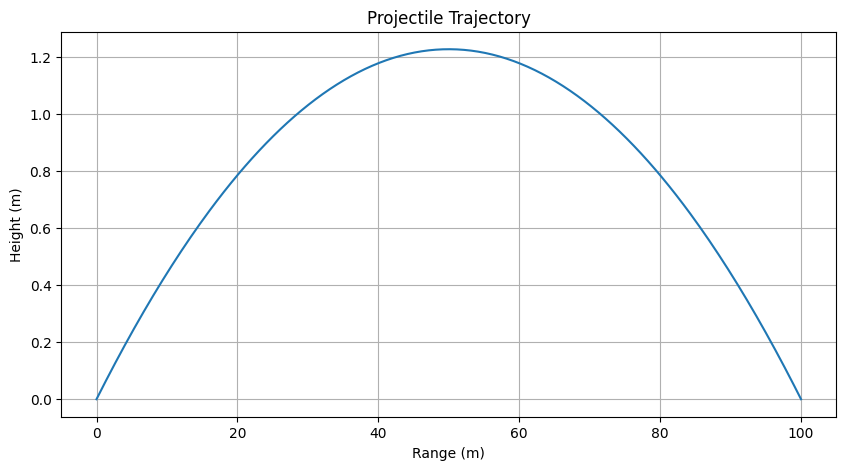

2.8120065902419666

In [ ]:
from scipy.optimize import newton
import numpy as np
import matplotlib.pyplot as plt

v = 100.0
g = 9.8
R = 100.0

def func(theta):
    return (v**2) * np.sin(2*theta) / g - R

def dfunc(theta):
    return (2*v**2) * np.cos(2*theta) / g

theta_0 = np.radians(30)

theta = newton(func, theta_0, dfunc)

t_flight = R / (v * np.cos(theta))

t_points = np.linspace(0, t_flight, num=300)

x_points = v * np.cos(theta) * t_points
y_points = v * np.sin(theta) * t_points - 0.5 * g * t_points**2

if theta >= 0 and t_flight > 0:
    plt.figure(figsize=(10, 5))
    plt.plot(x_points, y_points)
    plt.title('Projectile Trajectory')
    plt.xlabel('Range (m)')
    plt.ylabel('Height (m)')
    plt.grid(True)
    plt.show()
    theta_degrees = np.degrees(theta)
else:
    theta_degrees = -1

theta_degrees

# 11 - 2

# 12 - 1

In [ ]:
def f(x):
    return x**4 - 2*x + 1

def trapezoidal_rule(f, a, b, n):
    h = (b - a) / n
    sum = 0.5 * (f(a) + f(b))
    for i in range(1, n):
        sum += f(a + i * h)
    return h * sum

def simpsons_rule(f, a, b, n):
    h = (b - a) / n
    sum = f(a) + f(b)
    for i in range(1, n):
        if i % 2 == 0:
            sum += 2 * f(a + i * h)
        else:
            sum += 4 * f(a + i * h)
    return h * sum / 3

n_trapezoidal = 100
n_simpsons = 100

integral_trapezoidal = trapezoidal_rule(f, 0, 2, n_trapezoidal)
integral_simpsons = simpsons_rule(f, 0, 2, n_simpsons)

integral_trapezoidal, integral_simpsons

(4.401066656, 4.400000042666666)

# 12 - 2

In [ ]:
import numpy as np

def f(x, y):
    return 1 / ((x**2 + y**2 + 1)**1.5)

def trapezoidal_double_integral(f, a, b, c, d, n):
    hx = (b - a) / n
    hy = (d - c) / n

    I = 0
    for i in range(n + 1):
        for j in range(n + 1):
            x = a + i * hx
            y = c + j * hy
            if (i == 0 or i == n) and (j == 0 or j == n):
                w = 1
            elif i == 0 or i == n or j == 0 or j == n:
                w = 2
            else:
                w = 4
            I += w * f(x, y)
    return (hx * hy / 4) * I

n = 100

result = trapezoidal_double_integral(f, 0, 1, 0, 1, n)
result

0.5235923606220352